#Student achievement in secondary education of two Portuguese schools.
I found this data on Kaggle which is shared by the University of California, Irvine. This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.

The link for the data: https://archive.ics.uci.edu/ml/datasets/Student+Performance.

The research paper on which this idea is based on can be found here: http://www3.dsi.uminho.pt/pcortez/student.pdf.




In [41]:
#Importing the necessary libraries to get started

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

After this is done we will proceed to importing the dataset. The dataset has been downloaded from the link mentioned above and have uploaded in the Google Colab environment.

In [6]:
#Importing the dataset into a temp variable for further analysis
temp = pd.read_csv("/content/student-por.csv")

In [7]:
temp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


#To understand what each column refers to in the dataset, please refer to the reading below: -

##Attribute Information:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).<br>
2. sex - student's sex (binary: 'F' - female or 'M' - male).<br>
3. age - student's age (numeric: from 15 to 22).<br>
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [8]:
#To check the shape of our dataset
temp.shape

(649, 33)

In [9]:
#Check the NULL values
temp.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

After executing the cells above we came to know that our dataset got 649 rows, and 33 columns, and have no NULL values. As all of these columns won't be playing a significant amount of role in our analysis, we are going to drop some of them.

In [10]:
#Transfering useful columns into a new variable named "data"
data = temp[['sex','age','traveltime','studytime','failures','schoolsup','famsup','activities','internet','romantic','freetime','goout','health','absences','G1','G2','G3']]

For better understanding of the dataset, I would like to rename some of the columns: -
1. Activities --> ECC
2. G1 --> Year 1
3. G2 --> Year 2
4. G3 --> Year 3

In [52]:
# renaming the columns 
data.rename(columns = {'activities':'ECC'}, inplace = True)
data.rename(columns = {'G1':'Year_1'}, inplace = True)
data.rename(columns = {'G2':'Year_2'}, inplace = True)
data.rename(columns = {'G3':'Year_3'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
data.head()

,sex,age,traveltime,studytime,failures,schoolsup,famsup,ECC,internet,romantic,freetime,goout,health,absences,Year_1,Year_2,Year_3
0,1,18,2,2,0,1,0,0,0,0,3,4,3,4,0,11,11
1,1,17,1,2,0,0,1,0,1,0,3,3,3,2,9,11,11
2,1,15,1,2,0,1,0,0,1,0,3,2,3,6,12,13,12
3,1,15,1,3,0,0,1,1,1,1,2,2,5,0,14,14,14
4,1,16,1,2,0,0,1,0,0,0,3,2,5,0,11,13,13


Now, we will use all these columns as input parameter for our model and try to predict the Year 3 marks of a student, but before that, we will have to convert all the categorical quantities into some numerical quantities.

In [56]:
#Converting the categorical values into numerical values
data.sex.replace(('F', 'M'), (1, 2), inplace=True) #1 for female, 2 for male
data.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True) #1 for yes, 0 for no
data.famsup.replace(('yes', 'no'), (1, 0), inplace=True) #1 for yes, 0 for no
data.internet.replace(('yes', 'no'), (1, 0), inplace=True) #1 for yes, 0 for no
data.romantic.replace(('yes', 'no'), (1, 0), inplace=True) #1 for yes, 0 for no
data.ECC.replace(('yes','no'),(1,0),inplace=True)#1 for yes, 0 for no

TypeError: ignored

In [57]:
#Taking a look at the final numerical dataset
data.head()

,sex,age,traveltime,studytime,failures,schoolsup,famsup,ECC,internet,romantic,freetime,goout,health,absences,Year_1,Year_2,Year_3
0,1,18,2,2,0,1,0,0,0,0,3,4,3,4,0,11,11
1,1,17,1,2,0,0,1,0,1,0,3,3,3,2,9,11,11
2,1,15,1,2,0,1,0,0,1,0,3,2,3,6,12,13,12
3,1,15,1,3,0,0,1,1,1,1,2,2,5,0,14,14,14
4,1,16,1,2,0,0,1,0,0,0,3,2,5,0,11,13,13


In [66]:
#Finding the correlation in the dataset
data.corr()

,sex,age,traveltime,studytime,failures,schoolsup,famsup,ECC,internet,romantic,freetime,goout,health,absences,Year_1,Year_2,Year_3
sex,1.000000,-0.043662,0.040880,-0.206214,0.073888,-0.111202,-0.129467,0.124707,0.065911,-0.110144,0.146305,0.058178,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,-0.043662,1.000000,0.034490,-0.008415,0.319968,-0.167841,-0.101894,-0.054279,0.013115,0.178810,-0.004910,0.112805,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
traveltime,0.040880,0.034490,1.000000,-0.063154,0.097730,-0.044807,-0.039289,-0.033376,-0.190826,0.004751,0.000937,0.057454,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.206214,-0.008415,-0.063154,1.000000,-0.147441,0.089316,0.143509,0.070080,0.037529,0.033036,-0.068829,-0.075442,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.073888,0.319968,0.097730,-0.147441,1.000000,-0.000745,-0.006982,0.000561,-0.095330,0.069901,0.108995,0.045078,0.035588,0.122779,-0.384210,-0.385782,-0.393316
schoolsup,-0.111202,-0.167841,-0.044807,0.089316,-0.000745,1.000000,0.075402,-0.030246,-0.025942,-0.094310,-0.015611,-0.058124,0.022760,-0.059503,-0.071779,-0.056624,-0.066405
famsup,-0.129467,-0.101894,-0.039289,0.143509,-0.006982,0.075402,1.000000,-0.007433,0.071891,-0.023398,0.003764,0.017262,0.018803,0.041980,0.038255,0.038141,0.059206
ECC,0.124707,-0.054279,-0.033376,0.070080,0.000561,-0.030246,-0.007433,1.000000,0.082375,0.057517,0.150329,0.088582,0.013001,-0.015115,0.080123,0.067154,0.059791
internet,0.065911,0.013115,-0.190826,0.037529,-0.095330,-0.025942,0.071891,0.082375,1.000000,0.034832,0.063268,0.092869,-0.022792,0.067301,0.139931,0.147909,0.150025
romantic,-0.110144,0.178810,0.004751,0.033036,0.069901,-0.094310,-0.023398,0.057517,0.034832,1.000000,0.027112,-0.000520,-0.018025,0.079489,-0.074973,-0.097937,-0.090583


#Data Visualization

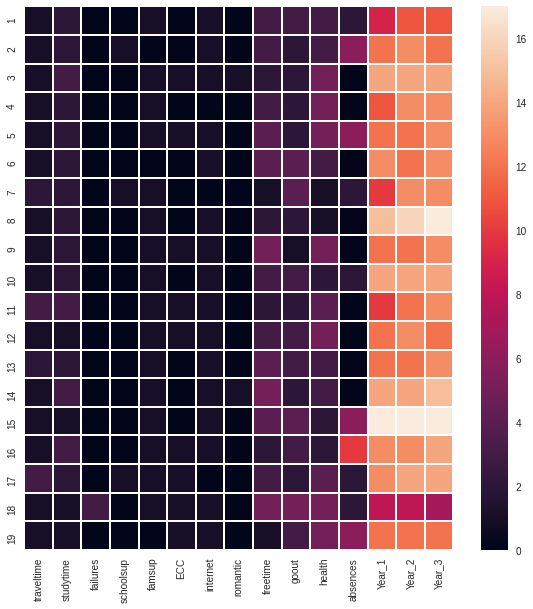

In [58]:
#Plotting the heatmap for first 20 rows of the dataset

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data.iloc[1:20,2:],linewidth=1, linecolor='w', square=True)


Now, we will plot histograms for all the three years to get a better understanding

Text(0.5, 0, 'Grades - Year_1')

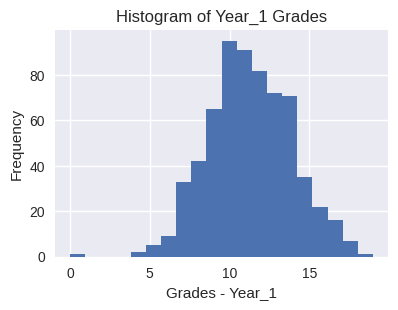

In [59]:
#Histogram for Year_1
plt.figure(figsize=(4.30,3), dpi=100)
plt.style.use('seaborn')
data['Year_1'].plot.hist(title='Histogram of Year_1 Grades',bins=20)
plt.xlabel('Grades - Year_1')

Text(0.5, 0, 'Grades - Year_2')

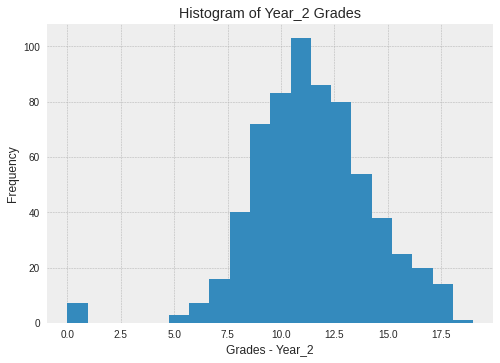

In [60]:
#Histogram for Year_2
plt.style.use('bmh')
data['Year_2'].plot.hist(title='Histogram of Year_2 Grades',bins=20)
plt.xlabel('Grades - Year_2')

Text(0.5, 0, 'Grades - Year_3')

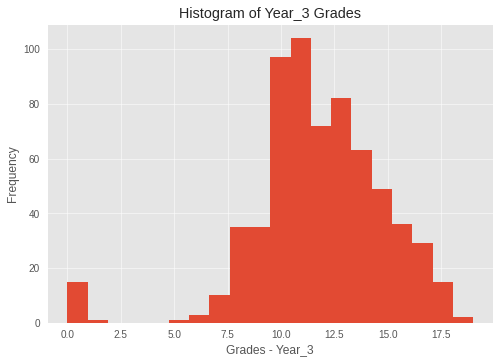

In [61]:
#Histogram for Year_3
plt.style.use('ggplot')
data['Year_3'].plot.hist(title='Histogram of Year_3 Grades', bins=20)
plt.xlabel('Grades - Year_3')

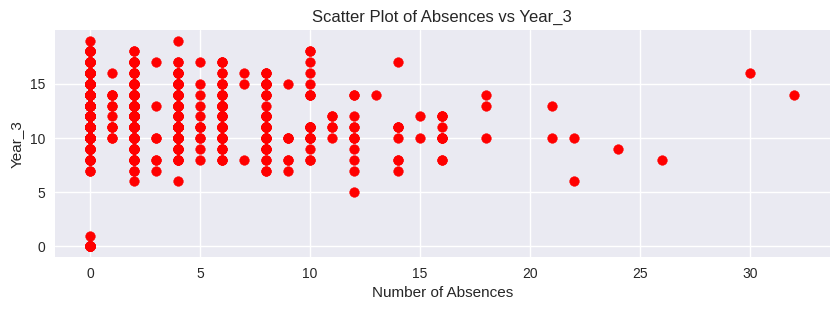

In [63]:
#Scatter plot for the Year_3 marks vs absences
plt.figure(figsize=(10,3), dpi=100)
plt.style.use('seaborn')
plt.xlabel('Number of Absences')
plt.ylabel('Year_3')
plt.title('Scatter Plot of Absences vs Year_3')
plt.scatter(data.absences,data.Year_3,color='red')

#Model Training

As we are ready cleaning and transforming the dataset, we are ready to split it. The column Year 3, which will be our label. So, we will have to remove that from the training dataset.

In [73]:
#Select every column except the Year 3
x=np.array(data.drop(['Year_3'],1))

In [74]:
#Selecting just the labels
y=np.array(data['Year_3']) 

In [75]:
#Importing the necessary libraries for the dataset to split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25) 

In [76]:
#Importing and implementing the linear regression 
from sklearn.linear_model import LinearRegression

linear=LinearRegression().fit(x_train, y_train)  #Fitting our model on x_train & y_train
accuracy=linear.score(x_test,y_test)  
print(accuracy)

0.8279792185118088


#Predicting Values

In [77]:
#Calling the predict function x_test
y_pred=linear.predict(x_test)   

for i in range(len(y_pred)):
    print(round(y_pred[i]),y_test[i])  


13 14
10 10
19 18
12 11
11 12
9 10
14 13
15 15
12 12
1 0
14 13
14 15
10 10
12 13
12 12
14 13
16 16
16 16
7 8
11 10
16 17
11 11
15 15
11 11
8 10
12 9
13 12
16 16
9 8
15 14
14 14
14 14
14 13
10 10
11 12
14 13
12 12
12 12
7 0
13 12
13 12
10 11
12 13
7 0
8 9
12 13
15 15
12 13
17 17
11 12
10 10
13 14
11 10
14 13
13 14
12 10
9 11
17 17
11 11
9 10
11 10
11 12
13 14
12 13
15 15
9 10
10 10
8 8
13 14
10 10
10 10
13 12
11 11
9 8
13 13
8 9
8 8
16 16
15 14
10 11
10 11
12 11
11 11
18 18
14 14
12 12
14 14
13 13
10 10
11 11
14 13
6 7
12 14
13 13
16 16
10 10
11 10
18 18
9 0
9 9
11 11
9 11
18 17
11 12
15 15
12 13
9 10
16 16
17 18
12 14
20 19
10 10
10 10
14 15
9 10
10 9
10 9
14 15
14 14
10 10
1 0
9 10
11 12
10 11
12 11
8 9
6 8
15 15
12 12
15 16
18 19
14 15
9 10
14 14
12 12
10 9
13 13
17 15
12 13
11 12
14 14
11 12
10 11
13 13
15 16
13 13
9 11
14 14
11 11
9 10
9 11
13 13
15 15
9 12
9 10
12 13
18 17
11 11
11 11
10 11
13 13
11 13
12 12


As we can see from the number displayed above, the numbers on the right are the actual values of the student scored in the Year_3 and on the left we have the corresponding predicted value from our model. As our model was able to predict it correctly, now it's ready to predict marks of a new student who joins the class.